In [1]:
import earthkit.hydro as ekh
import numpy as np
import matplotlib.pyplot as plt

network = ekh.river_network.load("efas", "5", use_cache=False)

Cache disabled.


# Catchment delineation

Locating a catchment of a gauge location in earthkit-hydro is done using the `catchments.find` method.

## Specifying locations

Specifying locations in earthkit-hydro can be done in 3 main ways. The simplest is to specify directly the coordinates as a dictionary. The EFAS network coordinates are latitude and longitude, so we can specify as below:

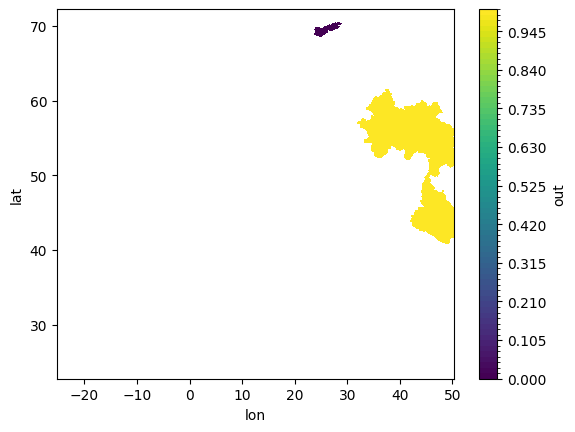

In [2]:
da = ekh.catchments.find(network, locations={
    "gauge_1": (70.475, 28.32),
    "gauge_2": (42.225, 50.24)
})

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

In [3]:
test = np.ones(network.shape, dtype=bool)
test[(106,  3214)] = 0
test.flat[network.mask].argmin()

np.int64(26066)

It is also possible to specify directly the grid indices.

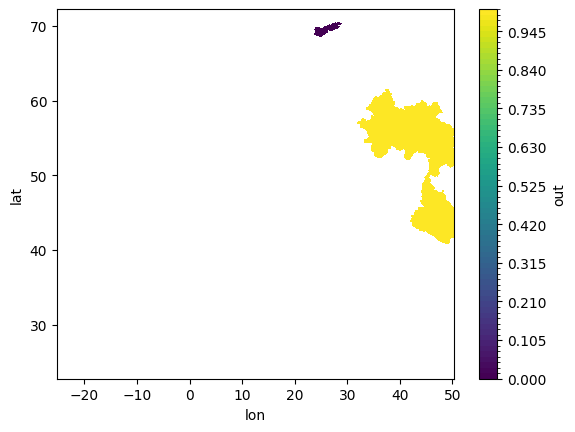

In [4]:
da = ekh.catchments.find(network, locations=[
    (106,  3214),
    (1801, 4529)
])

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

Or for very advanced cases, one can also specify directly the node ids.

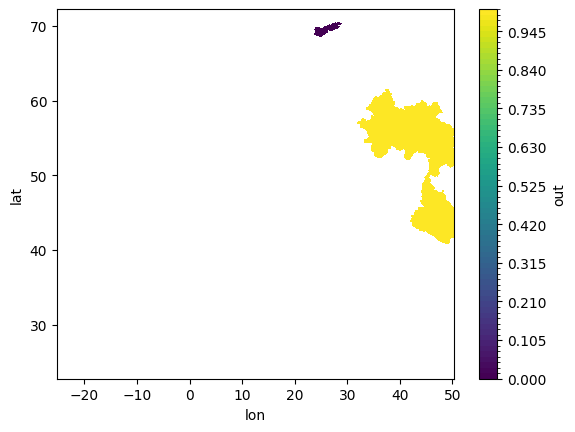

In [5]:
da = ekh.catchments.find(network, locations=[26066, 4153831])

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

## Subcatchments

Subcatchments can also be found by passing in the `overwrite=False` argument. This defines a new subcatchment at each gauge location.

<!-- Sub-basins are subdivisions of a basin, usually based on topography and the river network. The classic approach defines a new sub-basin at every confluence, but they can also be defined at gauge stations or for each reach, depending on the desired level of detail. If you use gauge stations, the division is arbitrary; if you go by confluences, it's topological; and if you divide by fixed distances or areas, it's geometric. The topological method is probably most common as it’s parsimonious, though it results in variable sub-basin sizes. Geometric approaches give more uniform sizes but increase the number of units. -->

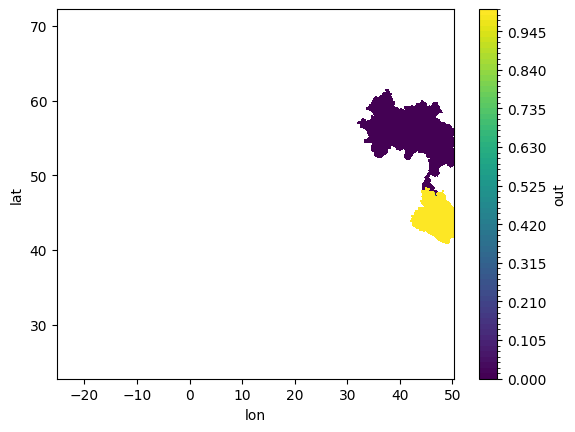

In [6]:
da = ekh.catchments.find(network, locations={
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
}, overwrite=False)

da.plot.contourf(cmap="viridis", levels=100)
plt.show()

...unlike the default `overwrite=True` which has the largest catchment overwrite all subcatchments.

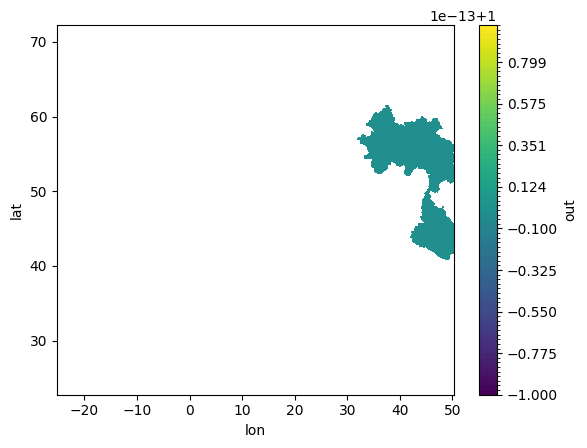

In [7]:
da = ekh.catchments.find(network, locations={
    "gauge_1": (47.04166666666667, 47.40833333333333),
    "gauge_2": (42.225, 50.24)
})

da.plot.contourf(cmap="viridis", levels=100)
plt.show()